# Impor Dataset

In [1]:
!apt-get install subversion > /dev/null

!svn export https://github.com/imansrf/disaster_area_identification/trunk/data > /dev/null

# Membuat Folder

In [2]:
import shutil
import os, sys

## create folders
if not os.path.exists('data_disaster/'):
    os.makedirs('data_disaster/train_images/pre_images')
    os.makedirs('data_disaster/train_images/post_images')
    os.makedirs('data_disaster/train_images/pre_buildings')
    os.makedirs('data_disaster/train_images/post_buildings')
    os.makedirs('data_disaster/train_labels/pre_labels')
    os.makedirs('data_disaster/train_labels/post_labels')

In [4]:
import json
import pandas as pd
from pandas.io.json import json_normalize

source ='data/train/images/'
dest = 'data_disaster/train_images/pre_images/'
pre_tsunami_images = sorted([f for f in os.listdir(source) if 'tsunami' in f and 'pre' in f])
for f in pre_tsunami_images:
    shutil.copy(source + f, dest)

In [5]:
source ='data/train/images/'
dest = 'data_disaster/train_images/post_images/'
post_tsunami_images = sorted([f for f in os.listdir(source) if 'tsunami' in f and 'post' in f])
for f in post_tsunami_images:
    shutil.copy(source + f, dest)

In [6]:
import json
import pandas as pd
from pandas.io.json import json_normalize

source ='data/train/labels/'
dest = 'data_disaster/train_labels/pre_labels/'

pre_tsunami_labels = sorted([f for f in os.listdir(source) if 'tsunami' in f and 'pre' in f])
for f in pre_tsunami_labels:
    shutil.copy(source + f, dest)

In [7]:
source ='data/train/labels/'
dest = 'data_disaster/train_labels/post_labels/'

post_tsunami_labels = sorted([f for f in os.listdir(source) if 'tsunami' in f and 'post' in f])
for f in post_tsunami_labels:
    shutil.copy(source + f, dest)

# Data Exploration

In [8]:
import pandas as pd

ROOT_PATH = ''

In [10]:
import json
from pandas.io.json import json_normalize

with open (ROOT_PATH + 'data_disaster/train_labels/post_labels/palu-tsunami_00000002_post_disaster.json') as f:
    data = json.load(f)

# convert buildings json data into pandas dataframe:
buildings_raw = data['features']['xy']
buildings_df = pd.DataFrame.from_dict(json_normalize(buildings_raw), orient='columns')
buildings_df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  if __name__ == '__main__':


,wkt,properties.feature_type,properties.subtype,properties.uid
0,"POLYGON ((827.1947747991766 38.05266036150195,...",building,no-damage,971e02df-cb7f-4db6-986e-a5759d37d7ee
1,"POLYGON ((923.0499820392861 35.6899999230119, ...",building,no-damage,6a02f21b-8059-4c83-bb79-ba975e738794
2,"POLYGON ((956.5165597985542 29.71629280817124,...",building,no-damage,c81fa786-4e7f-40b9-b042-fdb60ba02072
3,"POLYGON ((882.8796877291832 35.17580075222946,...",building,no-damage,0e5a70c7-1a2a-4fe5-9123-239c39424bc6
4,"POLYGON ((1007.785306028995 66.74944906072707,...",building,no-damage,a3466f3d-ca9c-4d2f-b9c2-84c074eec59d
...,...,...,...,...
316,"POLYGON ((58.5599604418947 36.33943248283705, ...",building,no-damage,53094760-b84c-4d41-809e-aeae364a9852
317,"POLYGON ((330.7137329339447 264.3348219249181,...",building,no-damage,a2587212-d3f3-4667-9b5d-5471c4eba416
318,"POLYGON ((441.7511553920975 426.538227628857, ...",building,no-damage,dcb92240-f195-4010-9bf4-2d8af4f3447f
319,"POLYGON ((416.9513452483098 883.4820980865841,...",building,destroyed,e72a7a48-b375-4901-bd91-38c0e28712b8


In [11]:
# for a single image
buildings_df['properties.subtype'].value_counts()

no-damage        273
destroyed         34
major-damage      11
un-classified      3
Name: properties.subtype, dtype: int64

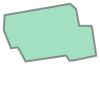

In [12]:
from shapely.geometry import Polygon
import shapely.wkt

P = shapely.wkt.loads(data['features']['xy'][0]['wkt'])
P

In [13]:
P.bounds

(789.0198001272803, 34.43021750760312, 845.709982047345, 69.81869768562817)

In [16]:
# get all files for post disaster
directory = ROOT_PATH + 'data_disaster/train_labels/post_labels/'
pattern = 'post'

post_disaster_files = [f for f in os.listdir(directory) if pattern in f]

In [17]:
# loop over post disaster data
all_json_data = []
for file in post_disaster_files:
    with open(directory + file) as f:
        data = json.load(f)
        all_json_data.append(data)

In [18]:
df = pd.DataFrame()
for curr_data in all_json_data:
    curr_building_raw = curr_data['features']['xy']
    df = df.append(json_normalize(curr_building_raw))
df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  after removing the cwd from sys.path.


,wkt,properties.feature_type,properties.subtype,properties.uid
0,"POLYGON ((470.5669660539418 25.44635968267463,...",building,no-damage,231a04a4-80ec-423d-9c29-7f0b220a5287
1,"POLYGON ((309.6355664253693 101.2105200420728,...",building,no-damage,90639f39-bbb3-4802-96fa-62feeb52732e
2,"POLYGON ((326.6513034203207 95.69201312598321,...",building,no-damage,00ecd0ac-656d-4f78-ada6-183dc397406e
3,"POLYGON ((358.9039710918511 91.8201194215462, ...",building,no-damage,8e928d1f-7994-404b-8b66-e6fe4f66a375
4,"POLYGON ((375.3251701092184 87.17165869063608,...",building,no-damage,e6b8bade-a5c6-4e0d-abdc-376ab1d837bd
...,...,...,...,...
90,"POLYGON ((399.2682765116863 308.5835746264426,...",building,destroyed,497f6cd4-5628-433a-a55c-c36782152fc9
91,"POLYGON ((384.5689845777545 325.5075132767154,...",building,destroyed,136b71b8-e574-4059-aecf-ba8dec264f05
92,"POLYGON ((360.4822477527965 305.025594206269, ...",building,destroyed,00b4a486-0e41-4a7e-84fd-20f7181e35c2
93,"POLYGON ((360.6805541007546 333.0508395498155,...",building,destroyed,7a393305-0d86-4e97-abbc-4026da50dd77


In [19]:
### Building damages for hurricanes
post_disaster_tsunami_files = [f for f in os.listdir(directory) if 'tsunami' in f]
post_disaster_tsunami_files = list(filter(lambda x: 'post' in x, post_disaster_tsunami_files))

In [20]:
tsunami_json_data = []
for file in post_disaster_tsunami_files:
    with open(directory + file) as f:
        data = json.load(f)
        tsunami_json_data.append(data)

In [21]:
df_tsunami = pd.DataFrame()
for curr_tsunami_data in tsunami_json_data:
    df_tsunami = df_tsunami.append(json_normalize(curr_tsunami_data['features']['xy']))
df_tsunami

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,wkt,properties.feature_type,properties.subtype,properties.uid
0,"POLYGON ((470.5669660539418 25.44635968267463,...",building,no-damage,231a04a4-80ec-423d-9c29-7f0b220a5287
1,"POLYGON ((309.6355664253693 101.2105200420728,...",building,no-damage,90639f39-bbb3-4802-96fa-62feeb52732e
2,"POLYGON ((326.6513034203207 95.69201312598321,...",building,no-damage,00ecd0ac-656d-4f78-ada6-183dc397406e
3,"POLYGON ((358.9039710918511 91.8201194215462, ...",building,no-damage,8e928d1f-7994-404b-8b66-e6fe4f66a375
4,"POLYGON ((375.3251701092184 87.17165869063608,...",building,no-damage,e6b8bade-a5c6-4e0d-abdc-376ab1d837bd
...,...,...,...,...
90,"POLYGON ((399.2682765116863 308.5835746264426,...",building,destroyed,497f6cd4-5628-433a-a55c-c36782152fc9
91,"POLYGON ((384.5689845777545 325.5075132767154,...",building,destroyed,136b71b8-e574-4059-aecf-ba8dec264f05
92,"POLYGON ((360.4822477527965 305.025594206269, ...",building,destroyed,00b4a486-0e41-4a7e-84fd-20f7181e35c2
93,"POLYGON ((360.6805541007546 333.0508395498155,...",building,destroyed,7a393305-0d86-4e97-abbc-4026da50dd77


In [22]:
# for hurricane buildings:
df_tsunami['properties.subtype'].value_counts()

no-damage        25455
destroyed         4966
major-damage       571
un-classified      401
minor-damage         1
Name: properties.subtype, dtype: int64

In [23]:
from shapely.geometry import Polygon

polygon_data = []
for image_meta in tsunami_json_data:
    for building in image_meta['features']['xy']:
        polygon_data.append((building['wkt'], building['properties']['subtype']))

polygon_bounds = []
for polygon in polygon_data:
    shapely_obj = shapely.wkt.loads(polygon[0])
    poly_bound = shapely_obj.bounds
    polygon_bounds.append((poly_bound[2]-poly_bound[0], poly_bound[3]-poly_bound[1]))

#P = shapely.wkt.loads(tsunami_json_data['features']['xy'][0]['wkt'])

In [24]:
polygon_widths = [polygon[0] for polygon in polygon_bounds]
polygon_y = [polygon[1] for polygon in polygon_bounds]

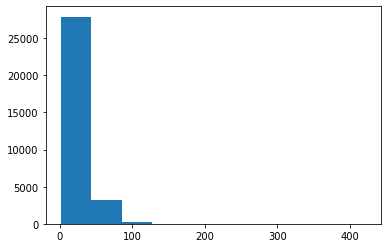

67.05647510955342

In [25]:
import matplotlib.pyplot as plt
import math
import numpy as np

poly_x_log = [math.log(polygon) for polygon in polygon_widths]
# plt.hist(poly_x_log)
plt.hist(polygon_widths)
plt.show()

#find 98 percentile
np_p_widths = np.array(polygon_widths)
crop_lim = np.percentile(np_p_widths, 98)
crop_lim #calculates the 98 percentile

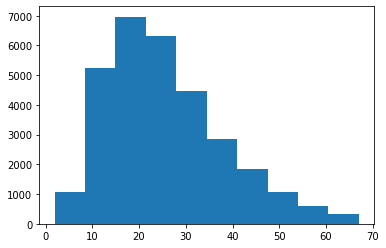

In [26]:
cropped_widths = [x for x in polygon_widths if x <= crop_lim]
plt.hist(cropped_widths)
plt.show()

In [27]:
print(len(polygon_widths))
print(len(cropped_widths))

31394
30766


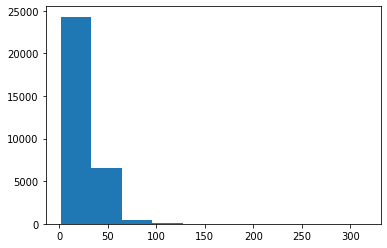

In [28]:
plt.hist(polygon_y)
plt.show()

In [29]:
cropped_y = [y for y in polygon_y if y <= 75]
print(len(polygon_y))
print(len(cropped_y))

31394
31113


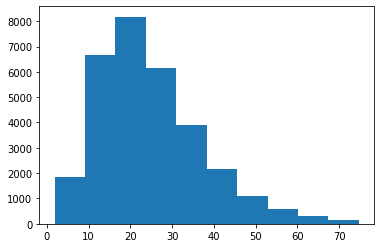

In [30]:
plt.hist(cropped_y)
plt.show()

In [31]:
# for all buildings:
df['properties.subtype'].value_counts()

no-damage        25455
destroyed         4966
major-damage       571
un-classified      401
minor-damage         1
Name: properties.subtype, dtype: int64

# Membuat Building Polygons


In [32]:
from PIL import Image, ImageDraw
import numpy
import shutil
import os
import json
from shapely.geometry import Polygon
import shapely.wkt

In [33]:
image_source = 'data_disaster/train_images/pre_images/'
dest = 'data_disaster/train_images/pre_buildings/'

pre_tsunami_images = sorted([f for f in os.listdir(image_source)])



In [35]:
def getBuildingImage(image, poly_xy, building_poly):
    imArray = numpy.asarray(image)
    
    # create mask
    maskIm = Image.new('L', (imArray.shape[1], imArray.shape[0]), 0)
    ImageDraw.Draw(maskIm).polygon(poly_xy, outline=1, fill=1)
    mask = numpy.array(maskIm)
    
    # assemble new image (uint8: 0-255)
    newImArray = numpy.empty(imArray.shape,dtype='uint8')

    # colors (three first columns, RGB)
    newImArray[:,:,:3] = imArray[:,:,:3]

    # transparency (4th column)
    newImArray[:,:,3] = mask*255

    # back to Image from numpy
    newIm = Image.fromarray(newImArray, "RGBA")
    
    #crop out just the building from image
    poly_bounds = building_poly.bounds
    cropped_building_img = newIm.crop(poly_bounds)
    
    #put center of cropped image onto standarized image size
    img_w, img_h = cropped_building_img.size
    background = Image.new('RGBA', (70, 70), (255, 255, 255, 0))
    bg_w, bg_h = background.size
    offset = ((bg_w - img_w) // 2, (bg_h - img_h) // 2)
    background.paste(cropped_building_img, offset)
    return background

In [36]:
## get json data for this file
json_source = 'data_disaster/train_labels/pre_labels/'
pre_tsunami_jsons = sorted([f for f in os.listdir(json_source)])

## cuts out building polygons from each image, standardrizes format, and saves images to data folder
#len(pre_tsunami_images)
for image_index in range(len(pre_tsunami_images)):
    image = Image.open(image_source + pre_tsunami_images[image_index]).convert("RGBA")
    with open (json_source + pre_tsunami_jsons[image_index]) as f:
        json_data = json.load(f)
    building_counter = 0
    for building in json_data['features']['xy']:
        building_wkt = building['wkt']
        building_poly = shapely.wkt.loads(building_wkt)
        x, y = building_poly.exterior.coords.xy
        poly_xy = [(x[i], y[i]) for i in range(len(x))]
        formatted_building_image = getBuildingImage(image, poly_xy, building_poly)
        
        building_number = str(building_counter)
        #formatting 
        while len(building_number) < 5:
            building_number = '0' + building_number
            
        formatted_building_image.save(dest + pre_tsunami_images[image_index].replace('.png', '') + '_building_' + building_number + '.png')
        building_counter += 1

In [38]:
## same thing for post images
image_source = 'data_disaster/train_images/post_images/'
dest = 'data_disaster/train_images/post_buildings/'

post_tsunami_images = sorted([f for f in os.listdir(image_source)])

## get json data for this file
json_source = 'data_disaster/train_labels/post_labels/'
post_tsunami_jsons = sorted([f for f in os.listdir(json_source)])

## cuts out building polygons from each image, standardrizes format, and saves images to data folder
#len(pre_tsunami_images)
len(post_tsunami_images)
for image_index in range(len(post_tsunami_images)):
    image = Image.open(image_source + post_tsunami_images[image_index]).convert("RGBA")
    with open (json_source + post_tsunami_jsons[image_index]) as f:
        json_data = json.load(f)
    building_counter = 0
    for building in json_data['features']['xy']:
        building_wkt = building['wkt']
        building_poly = shapely.wkt.loads(building_wkt)
        x, y = building_poly.exterior.coords.xy
        poly_xy = [(x[i], y[i]) for i in range(len(x))]
        formatted_building_image = getBuildingImage(image, poly_xy, building_poly)
        building_number = str(building_counter)
        
        #formatting 
        while len(building_number) < 5:
            building_number = '0' + building_number
        
        formatted_building_image.save(dest + post_tsunami_images[image_index].replace('.png', '') + '_building_' + building_number + '.png')
        building_counter += 1

In [39]:
damage_labels = []
for image_json in post_tsunami_jsons:
    with open (json_source + image_json) as f:
        json_data = json.load(f)
        
    for building in json_data['features']['xy']:
        damage_labels.append(building['properties']['subtype'])

len(damage_labels)

31394

# Transfer Learning

In [40]:
from keras.applications.resnet50 import ResNet50, preprocess_input

In [41]:
HEIGHT = 70
WIDTH = 70

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(HEIGHT, WIDTH, 3))

94773248/94765736 [==============================] - 1s 0us/step


In [42]:
import numpy as np
import json
import os
post_building_files = sorted(os.listdir('data_disaster/train_images/post_buildings'))

json_source = 'data_disaster/train_labels/post_labels/'
post_tsunami_jsons = sorted([f for f in os.listdir(json_source)])

damage_labels = []
for image_json in post_tsunami_jsons:
    with open (json_source + image_json) as f:
        json_data = json.load(f)
        
    for building in json_data['features']['xy']:
        damage_labels.append(building['properties']['subtype'])

In [43]:
from PIL import Image

Images = []
for f in post_building_files:
    Images.append(Image.open('data_disaster/train_images/post_buildings/' + f).convert('RGB'))
    
X_post = []
for I in Images:
    X_post.append(np.asarray(I))
    
X_post = np.array(X_post)
X_post.shape

(31394, 70, 70, 3)

In [44]:
X_post_padded = [np.pad(img, ((73, 74), (73, 74), (0,0)), 'constant', constant_values=(255,)) for img in X_post]

In [45]:
X_post_padded = np.array(X_post_padded)
X_post_padded.shape

(31394, 217, 217, 3)

In [46]:
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.models import Sequential, Model

## remove the FC layers
dropout = 0.5
num_classes = 2
FC = [1024, 1024]

for layer in base_model.layers:
    layer.trainable = False
    
x = base_model.output
x = Flatten()(x)

for fc in FC:
    x = Dense(fc, activation='relu')(x)
    x = Dropout(dropout)(x)

# new softmax layer:
predictions = Dense(num_classes, activation='softmax')(x)

new_model = Model(inputs=base_model.input, outputs=predictions)

# CNN model

In [47]:
import os
import numpy as np
import json

In [48]:
X = []
Y = []

pre_building_files = sorted(os.listdir('data_disaster/train_images/pre_buildings'))
post_building_files = sorted(os.listdir('data_disaster/train_images/post_buildings'))

In [49]:
json_source = 'data_disaster/train_labels/post_labels/'
post_tsunami_jsons = sorted([f for f in os.listdir(json_source)])

damage_labels = []
for image_json in post_tsunami_jsons:
    with open (json_source + image_json) as f:
        json_data = json.load(f)
        
    for building in json_data['features']['xy']:
        damage_labels.append(building['properties']['subtype'])

In [50]:
from PIL import Image

Images = []
for f in pre_building_files:
    Images.append(Image.open('data_disaster/train_images/pre_buildings/' + f).convert('RGB'))

In [51]:
X_pre = []
for I in Images:
    X_pre.append(np.asarray(I))

In [52]:
X_pre = np.array(X_pre)
X_pre.shape

(31394, 70, 70, 3)

In [53]:
Images = []
for f in post_building_files:
    Images.append(Image.open('data_disaster/train_images/post_buildings/' + f).convert('RGB'))

In [54]:
X_post = []
for I in Images:
    X_post.append(np.asarray(I))

In [55]:
X_post = np.array(X_post)
X_post.shape

(31394, 70, 70, 3)

In [56]:
X = np.concatenate((X_pre, X_post), axis=3)
X.shape

(31394, 70, 70, 6)

In [57]:
len(damage_labels)

31394

In [60]:
label_map = {'no-damage': 0, 'minor-damage': 1, 'major-damage': 2, 'destroyed': 3, 'un-classified': 4}

for label in damage_labels:
    Y.append(label_map[label])
    

In [ ]:
train_X = X.astype('float32')[:int(0.8*len(X))]
test_X = X.astype('float32')[int(0.8*len(X)):]
train_Y = Y[0:int(0.8*len(Y))]
test_Y = Y[int(0.8*len(Y)):]

In [ ]:
print(test_Y.count(0))
print(test_Y.count(1))
print(test_Y.count(2))
print(test_Y.count(3))
print(test_Y.count(4))

4592
0
134
1519
34


In [ ]:
# train_X = X.astype('float32')
# train_X /= 255

# train_Y = Y

# train_X.shape

train_X /= 255
test_X /= 255

train_X.shape

(25115, 50, 50, 6)

In [ ]:
from keras.models import Sequential
from keras.layers import Input, Dropout, Flatten, Conv2D, MaxPooling2D, Dense, Activation, Reshape
from keras.optimizers import RMSprop
from keras.layers.normalization import BatchNormalization
from keras.constraints import max_norm

model = Sequential()

In [ ]:
# Define the network
# as first layer in a Sequential model
model.add(Conv2D(32, (3, 3), padding='same', kernel_initializer='glorot_normal', input_shape=(50, 50,6)))
#model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), padding='same', kernel_initializer='glorot_normal'))
#model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3, 3), padding='same', kernel_initializer='glorot_normal'))
#model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same', kernel_initializer='glorot_normal'))
#model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

# Fully connected layer
model.add(Dense(512, kernel_initializer='glorot_normal'))
#model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1, kernel_initializer='glorot_normal'))
model.add(Activation('sigmoid'))


# Defining loss and optimizer
optimizer = RMSprop(lr=1e-4)
loss = 'binary_crossentropy'
model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])


In [ ]:
train_X=np.array(train_X)
train_Y=np.array(train_Y)
batch_size = 64
EPOCHS = 20

# test the network:
history=model.fit(train_X, train_Y, batch_size=batch_size, epochs=EPOCHS, validation_split=0.2, verbose=1, shuffle=True)

Epoch 1/20
314/314 [==============================] - 6s 20ms/step - loss: 0.4741 - accuracy: 0.3090 - val_loss: 2.2561 - val_accuracy: 0.0701
Epoch 2/20
314/314 [==============================] - 6s 19ms/step - loss: -1.6528 - accuracy: 0.3821 - val_loss: 3.7013 - val_accuracy: 0.5182
Epoch 3/20
314/314 [==============================] - 6s 19ms/step - loss: -18.9369 - accuracy: 0.3798 - val_loss: 10.1091 - val_accuracy: 0.7382
Epoch 4/20
314/314 [==============================] - 6s 19ms/step - loss: -97.1922 - accuracy: 0.3784 - val_loss: 218.0254 - val_accuracy: 0.3199
Epoch 5/20
314/314 [==============================] - 6s 19ms/step - loss: -359.1263 - accuracy: 0.3769 - val_loss: 449.2474 - val_accuracy: 0.4340
Epoch 6/20
314/314 [==============================] - 6s 19ms/step - loss: -1020.1431 - accuracy: 0.3761 - val_loss: 1128.6819 - val_accuracy: 0.3126
Epoch 7/20
314/314 [==============================] - 6s 18ms/step - loss: -2564.4150 - accuracy: 0.3737 - val_loss: 1814.

In [ ]:
test_predict_Y = model.predict(test_X, batch_size=batch_size, verbose=0, steps=None, callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=False)
test_predict_Y

array([[0.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import accuracy_score

correct_damaged = 0
correct_undamaged = 0
incorrect_damaged = 0
incorrect_undamaged = 0
for index in range(len(test_Y)):
    if int(test_Y[index]) > 0:
        if int(test_predict_Y[index]) > 0:
            correct_damaged += 1
        else:
            incorrect_damaged += 1
    else:
        if int(test_predict_Y[index]) > 0:
            incorrect_undamaged += 1
        else:
            correct_undamaged += 1

print('# of damaged buildings correctly labeled as damaged: ', correct_damaged)
print('# of damaged buildings incorrectly labeled as undamaged: ', incorrect_damaged)
print('# of undamaged buildings correctly labeled as undamaged: ', correct_undamaged)
print('# of undamaged buildings incorrectly labeled as damaged: ', incorrect_undamaged)
    
#multilabel_confusion_matrix(test_Y, test_predict_Y)

# of damaged buildings correctly labeled as damaged:  1219
# of damaged buildings incorrectly labeled as undamaged:  468
# of undamaged buildings correctly labeled as undamaged:  1986
# of undamaged buildings incorrectly labeled as damaged:  2606


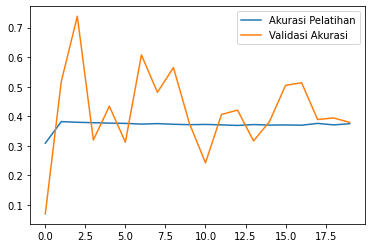

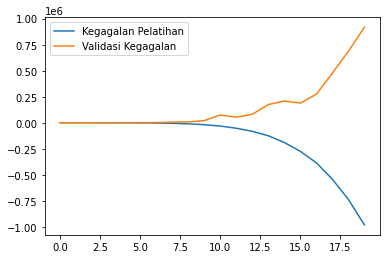

In [ ]:
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.callbacks import History
plt.plot(history.history["accuracy"],label="Akurasi Pelatihan")
plt.plot(history.history["val_accuracy"],label="Validasi Akurasi")
plt.legend()
plt.show()

plt.plot(history.history["loss"],label="Kegagalan Pelatihan")
plt.plot(history.history["val_loss"],label="Validasi Kegagalan")
plt.legend()
plt.show()